## 사설망을 구성하고 접속하기

### 단계 1: genesis.json 설정

In [1]:
%%writefile _genesis.json
{
  "config": {
    "chainId": 33,
    "homesteadBlock": 0,
    "eip150Block": 0,
    "eip155Block": 0,
    "eip158Block": 0
  },
  "nonce": "0x0000000000000033",
  "timestamp": "0x0",
  "parentHash": "0x0000000000000000000000000000000000000000000000000000000000000000",
  "gasLimit": "0x8000000",
  "difficulty": "0x100",
  "mixhash": "0x0000000000000000000000000000000000000000000000000000000000000000",
  "coinbase": "0x3333333333333333333333333333333333333333",
  "alloc": {}
}

Writing _genesis.json


### 단계 2: geth 네트워크 초기화

### 단계 3: 계정 발급
### 단계 4: geth 사설망 접속

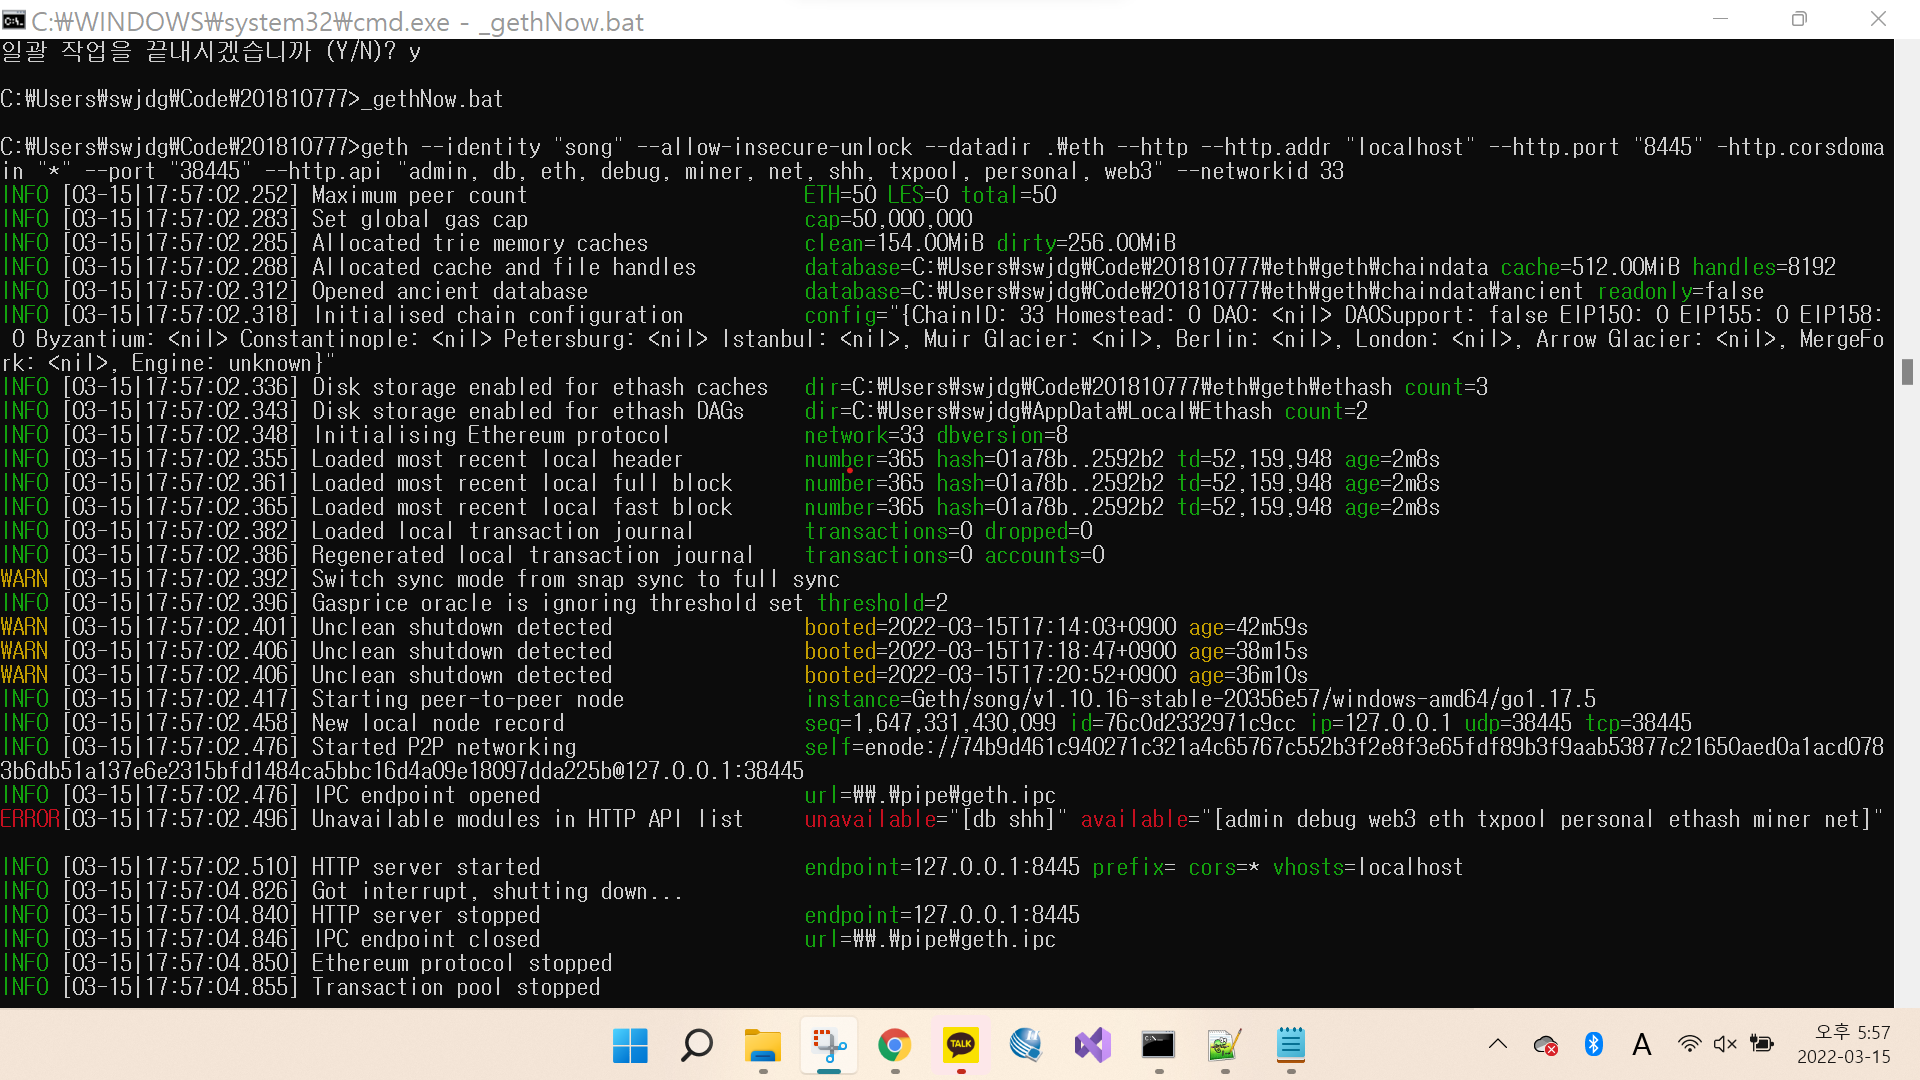

### 단계 5: 충전

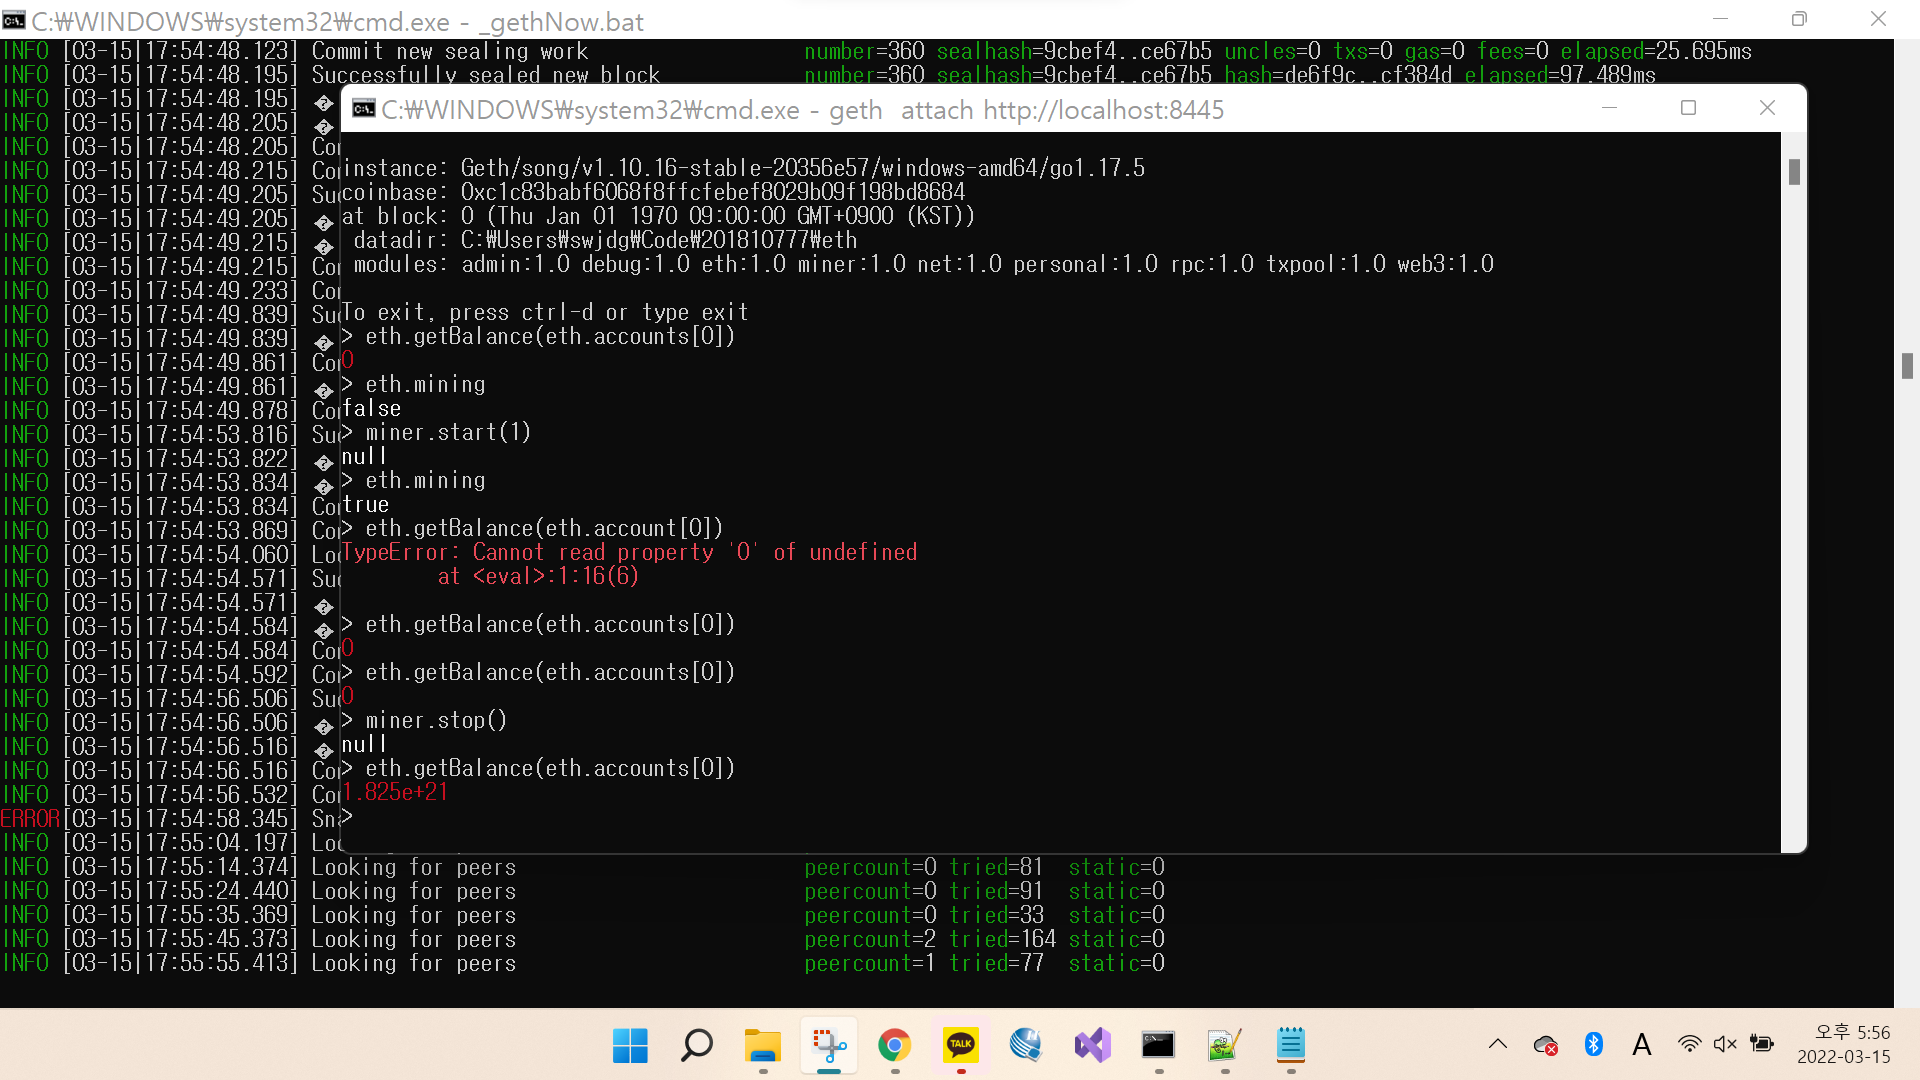

### 메인네트워크 admin.nodeInfo 캡쳐
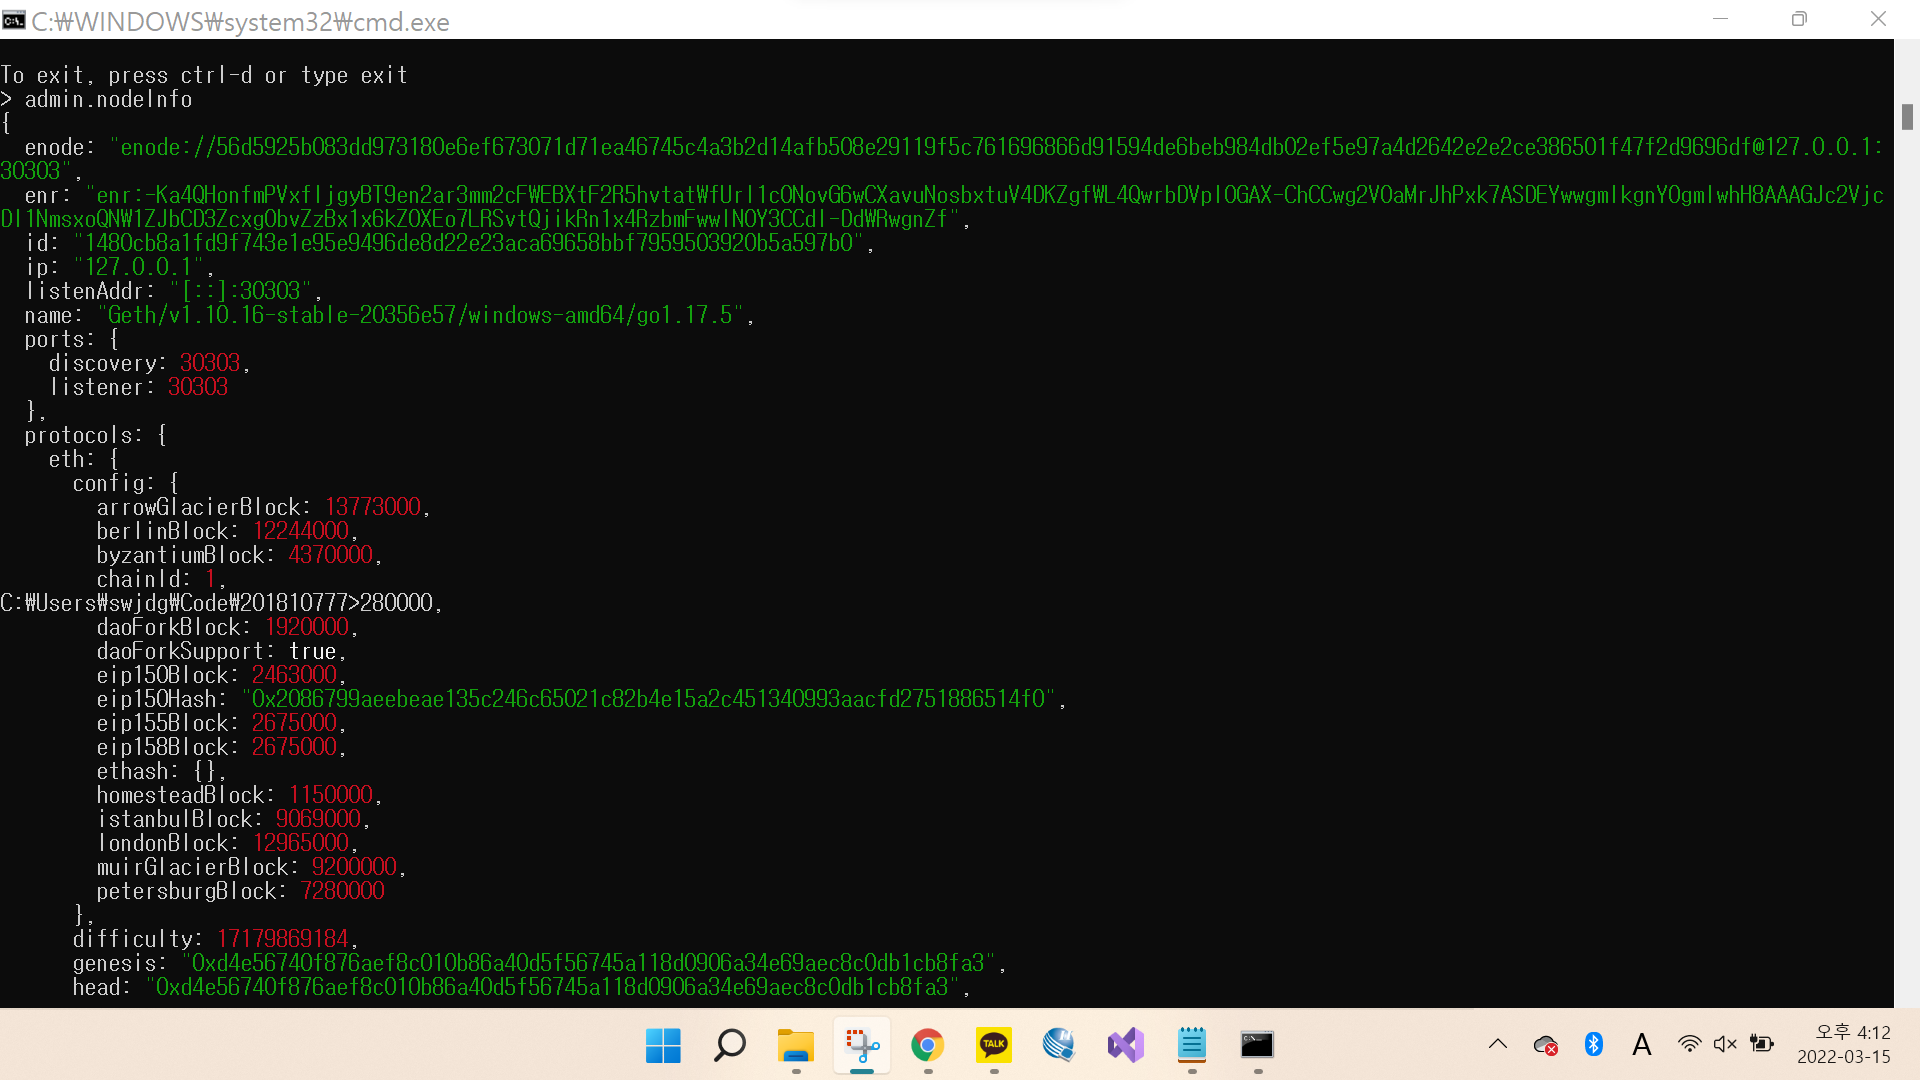

### 테스트네트워크 admin.nodeInfo 캡쳐
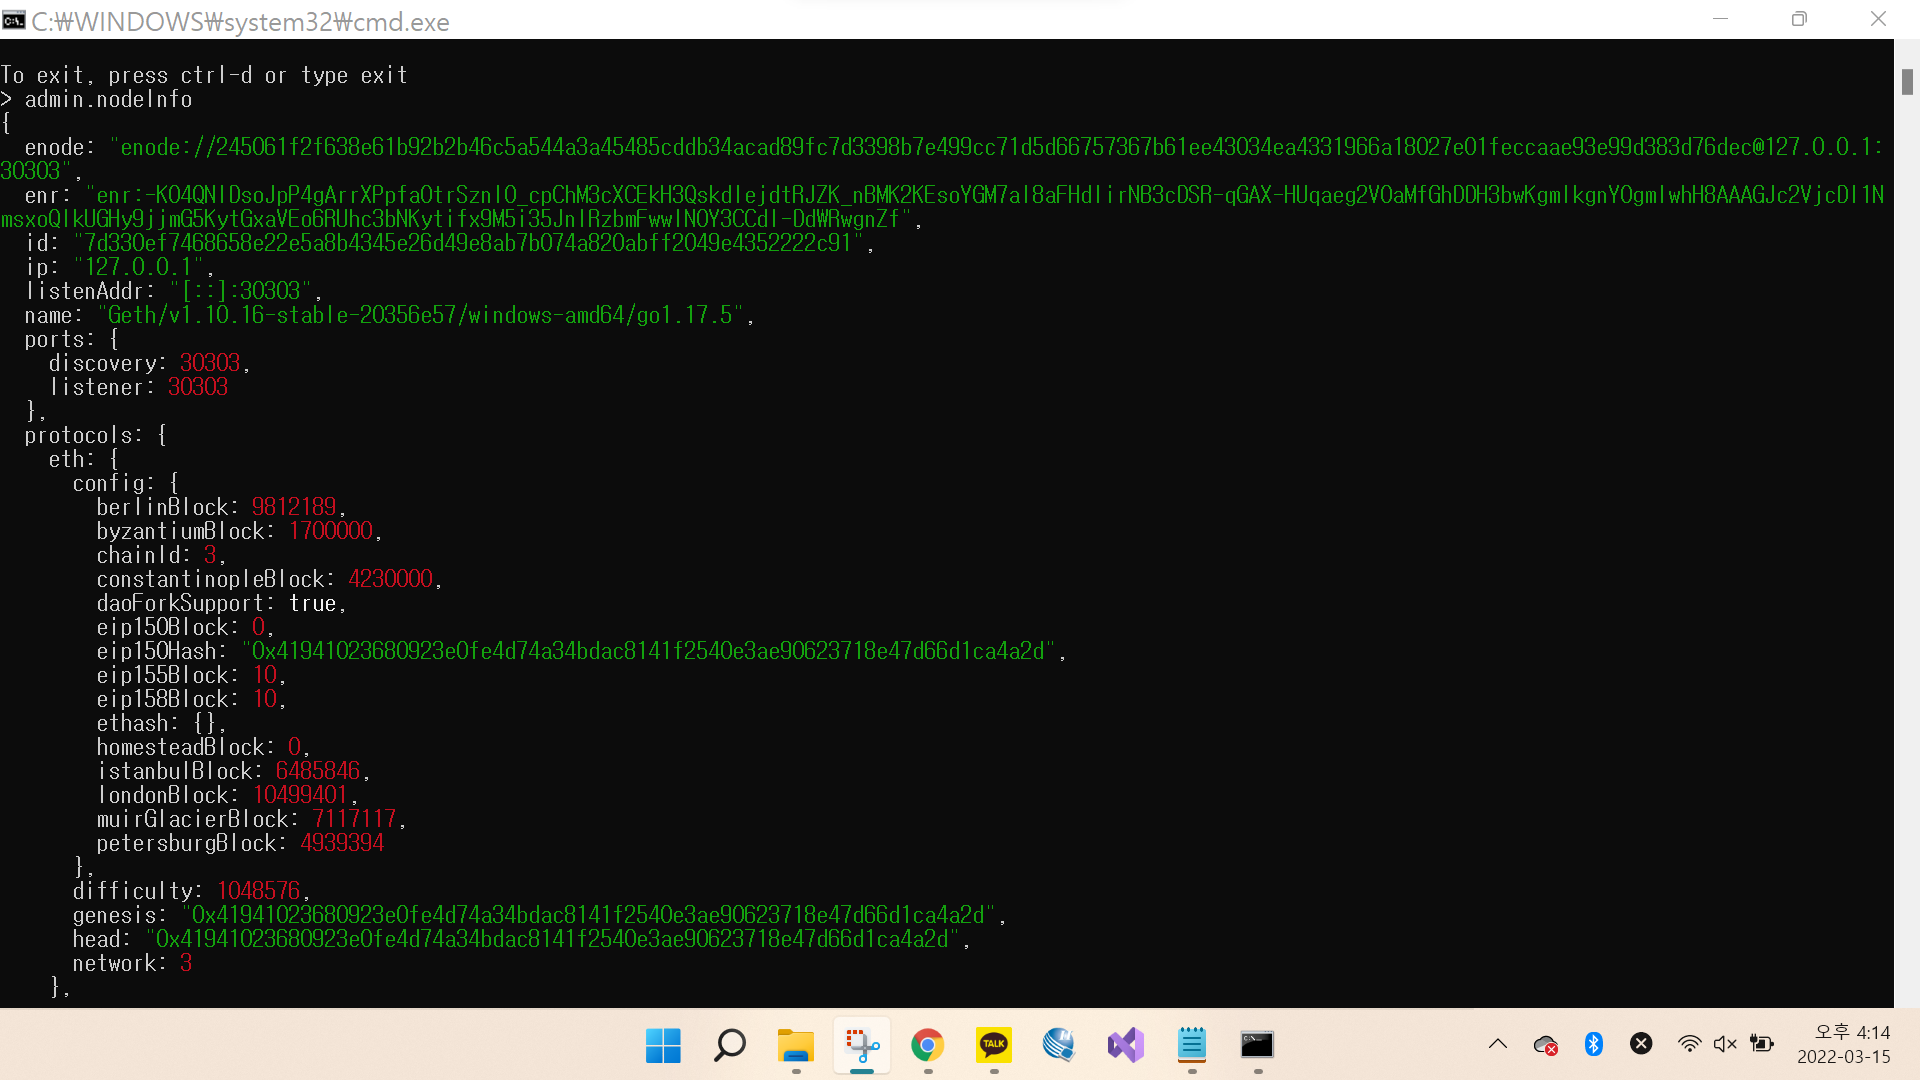

문제1.

아래 작업을 자바스크립트파일 ```exercise1.js```로 저장하고 명령창에서 geth --exec로 실행하세요.

출력하기 위해서는 ```console.log("Block Number:" , eth.blockNumber)``` 이런 방식으로 하세요.

아래 문제를 풀기 전, 우선 계정을 2개 더 생성한다. 각 계정의 잔액을 5 ether 이상이 되도록 충전한다.

문제를 풀면서, geth 창에 발생하는 로그를 관찰해보자.

실행과 결과가 모두 한 화면에 나오도록 캡쳐해서 제출한다.



 1. 현재 블록번호를 출력

 2. 자신의 enode 값을 출력

 3. peer가 있는지? 있으면 그 peer를 출력

 4. 계정 목록을 출력

 5. 각 계정의 잔액을 ether로 출력

 6. 코인베이스를 2번째로 변경하고, 변경전과 변경후의 coinbase를 출력

 7. 현재 대기하는 트랙잭션 수를 출력. 없다면 그 이유를 메시지로 출력

 8. 현재 블록번호를 출력. 블록번호가 처음 출력했을 때와 변동이 있는지? 계정을 출력하거나, 잔고를 출력하는 등 몇 차례 작업이 있었는데도 불구하고 블록 번호가 그대로인 이유를 메시지로 출력.

In [ ]:
console.log('1. blocknumber: ', eth.blockNumber,'\n');
console.log('2. enode: ', admin.nodeInfo.enode,'\n');
console.log('3. peer: ',net.peerCount,'\n');
if(net.peerCount>0){
	console.log('information of peers: ',JSON.stringify(admin.peers),'\n');
}
console.log('4. list of address: ',eth.accounts,'\n');
console.log('5. balance: ',eth.getBalance(eth.accounts[0]),eth.getBalance(eth.accounts[1]),eth.getBalance(eth.accounts[2]),'\n');

miner.setEtherbase(eth.accounts[0]);
console.log('6. before change: ',eth.coinbase);
miner.setEtherbase(eth.accounts[1]);
console.log('6. after change: ',eth.coinbase,'\n');

console.log('7. number of waition transaction: ', JSON.stringify(txpool.status));
console.log('거래를 만들지 않았기 때문에 대기하는 트랜잭션이 없다.\n');

console.log('8. blocknumber: ', eth.blockNumber);
console.log('블록체인을 조회하는것은 트랜잭션이 아니라 블록체인에 기록되지 않는다. 따라서 블록번호 증가하지 않는다. 증가하려면 블록체인에 기록이 되고, 마이닝을 통해 연결이 되어야 한다.');


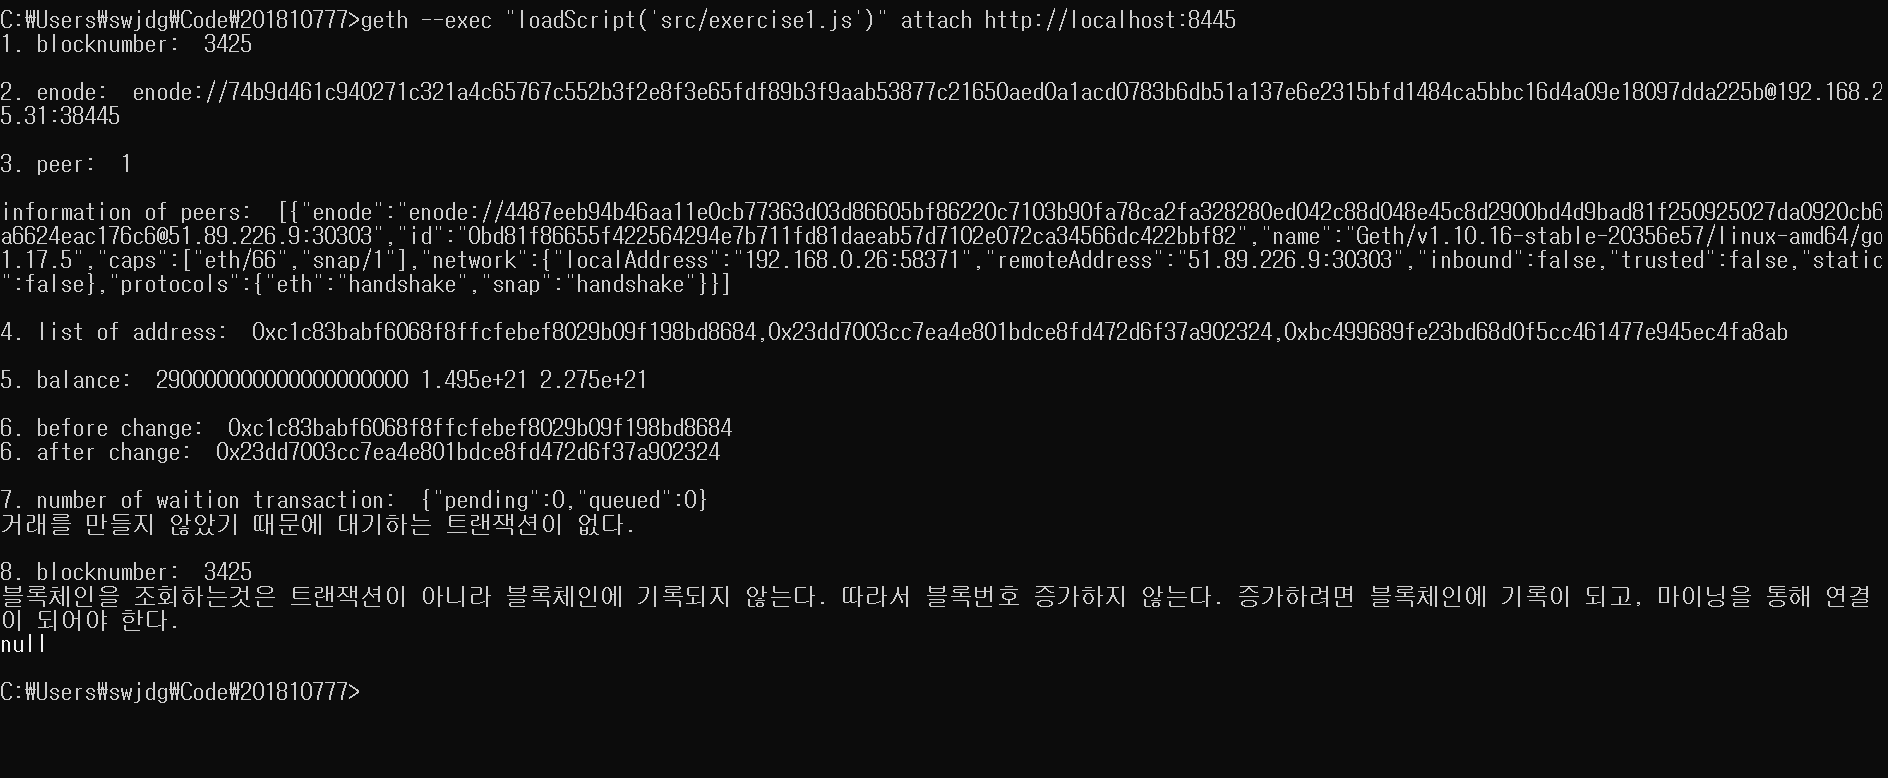

문제 2.

연습문제 1

다음 2건의 데이터에 대해 Merkle Root 값을 계산하고 출력하세요.

* txA = 'Hello'

* txB = 'How are you?'



1. txA을 재해싱하세요 (_hA)

2. _hA를 바이트교환을 하세요 hA

3. txB를 재해싱하세요 (_hB)

4. _hB를 바이트교환을 하세요 hB

5. hA+hB를 하세요 _hAhB

6. hAB를 재해싱하세요 (_hAB)

7. _hAB를 바이트교환을 하세요 hAB


In [8]:
import hashlib
txA = "Hello"
txB = 'How are you?'
_hashA=hashlib.sha256(hashlib.sha256(txA.encode()).digest()).hexdigest()
_hashB=hashlib.sha256(hashlib.sha256(txB.encode()).digest()).hexdigest()

In [9]:
_hashA

'70bc18bef5ae66b72d1995f8db90a583a60d77b4066e4653f1cead613025861c'

In [10]:
_hashB

'1027ce357faf49fc632d35908db181ae951aa3df9060595d94fb33769d71e7d0'

In [11]:
hashAswap="".join(reversed([_hashA[i:i+2] for i in range(0, hashlib.sha256(txA.encode()).digest_size*2, 2)]))
hashBswap="".join(reversed([_hashB[i:i+2] for i in range(0, hashlib.sha256(txB.encode()).digest_size*2, 2)]))

In [12]:
hashAswap

'1c86253061adcef153466e06b4770da683a590dbf895192db766aef5be18bc70'

In [14]:
hashBswap

'd0e7719d7633fb945d596090dfa31a95ae81b18d90352d63fc49af7f35ce2710'

In [15]:
hashAB=hashAswap+hashBswap

In [16]:
_hashAB=hashlib.sha256(hashlib.sha256(hashAB.encode()).digest()).hexdigest()

In [17]:
hashABswap="".join(reversed([_hashAB[i:i+2] for i in range(0, 32*2, 2)]))

In [18]:
hashABswap

'032916ba0fc9c63fc5440a3b20069370da1b5d3c605797b28ac1a5a5876dc7e0'

연습문제 2

친구에게  주소를 구하고, 그 주소로 송금해 보자. 송금이 되지 않으면 왜 안되는지 이유를 알아보자.

안되면 친구의 주소를 만들고 전송한다.

잔고의 증가분을 출력하세요.

소요된 gas비용 출력하세요.



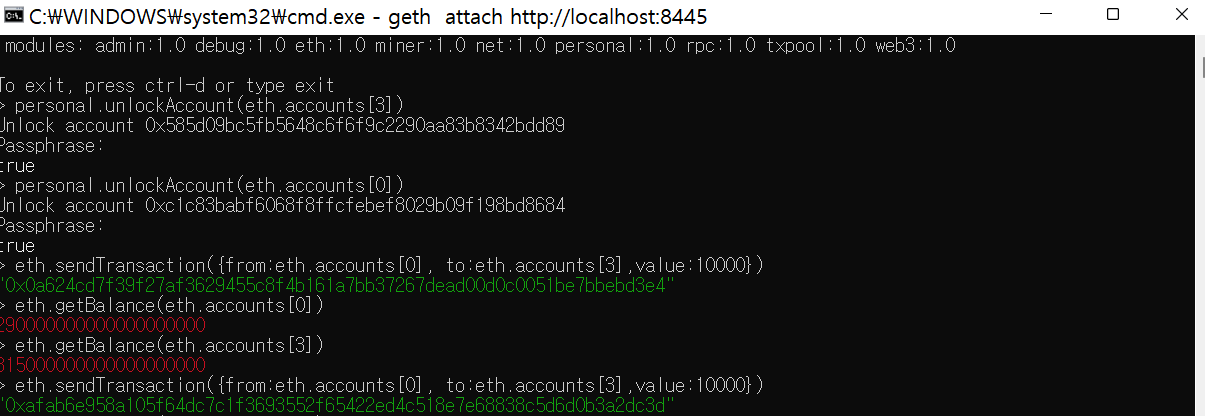



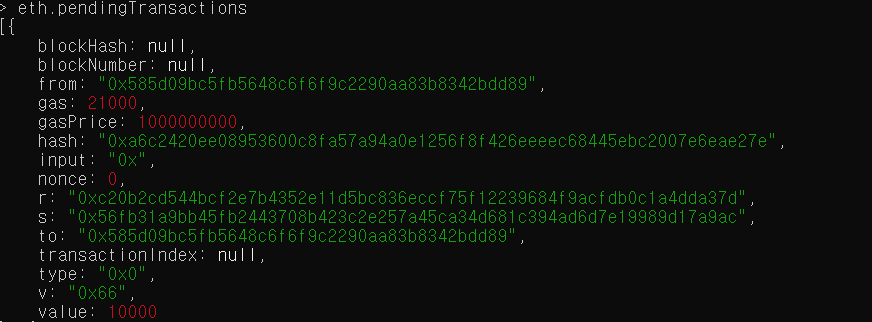

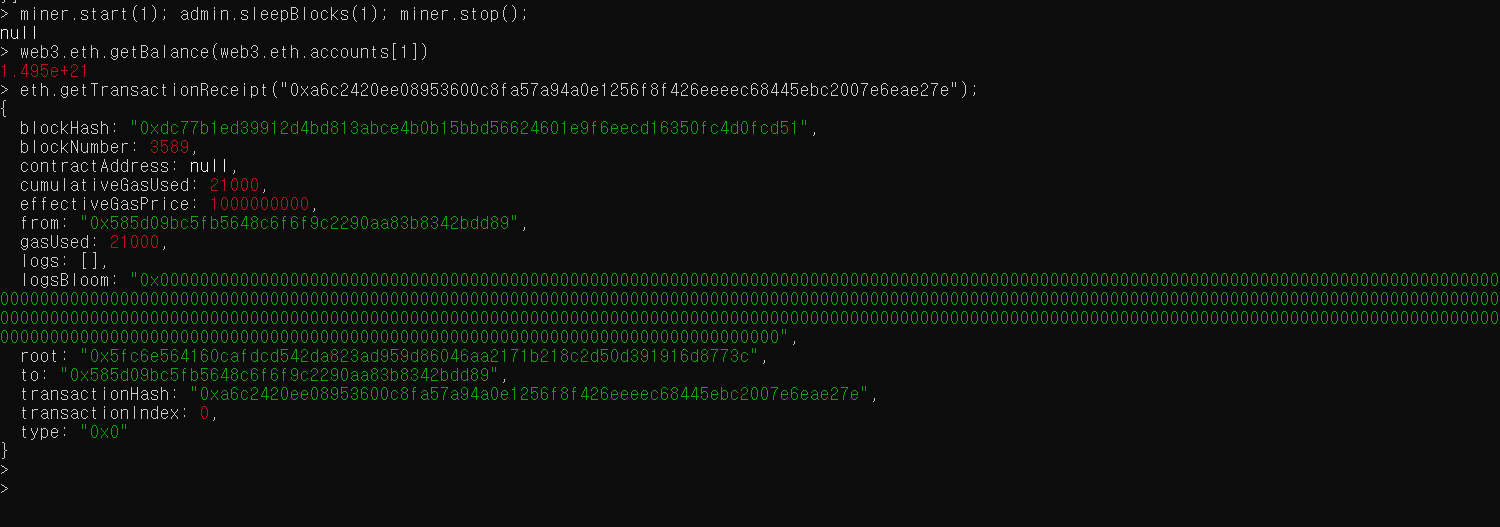

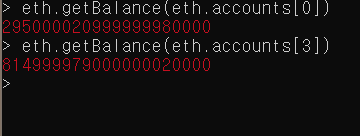

연습문제 3

블록헤더 데이터의 해시 값에 NONCE를 증가시키면서

앞 자리의 0의 개수를 맞출 때까지 반복한다.

(1) 찾고자 하는 해시가 ```0000```로 시작한다고 하자. 몇 회만에 찾는지 출력하세요.

(2) 찾고자 하는 해시가 ```00000```로 시작한다고 하자. 몇 회만에 찾는지 출력하세요.

(3) 찾고자 하는 해시가 ```000000```로 시작한다고 하자. 몇 회만에 찾는지 출력하세요.

In [19]:
import hashlib
ntry=1
found=False
blockNumber=54 # hex
NONCE=0
data='Hello'
previousHash='5d7c7ba21cbbcd75d14800b100252d5b428e5b1213d27c385bc141ca6b47989e'
while found==False:
    z=str(blockNumber)+str(NONCE)+data+previousHash
    guessHash=hashlib.sha256(z.encode('utf-8')).hexdigest()
    if guessHash[:4]=='0000':
        found=True
    NONCE+=1
    if(NONCE%10000000==0):   #print guessHash every 10000000
        print("NONCE: ",NONCE, guessHash)
print("Solved ", "NONCE: ", NONCE, "guessHash: ", guessHash)

Solved  NONCE:  94280 guessHash:  000043ce4a61d02bff0e68ba18a7daf448cb3b93691fdd4850f6cd3f85b7a13f


In [20]:
import hashlib
ntry=1
found=False
blockNumber=54 # hex
NONCE=0
data='Hello'
previousHash='5d7c7ba21cbbcd75d14800b100252d5b428e5b1213d27c385bc141ca6b47989e'
while found==False:
    z=str(blockNumber)+str(NONCE)+data+previousHash
    guessHash=hashlib.sha256(z.encode('utf-8')).hexdigest()
    if guessHash[:5]=='00000':
        found=True
    NONCE+=1
    if(NONCE%10000000==0):   #print guessHash every 10000000
        print("NONCE: ",NONCE, guessHash)
print("Solved ", "NONCE: ", NONCE, "guessHash: ", guessHash)

Solved  NONCE:  315753 guessHash:  000007f9f69a43f1bb6ab92672d873b93d6bafaa2007e44b6151bd19efadf4d1


In [22]:
import hashlib
ntry=1
found=False
blockNumber=54 # hex
NONCE=0
data='Hello'
previousHash='5d7c7ba21cbbcd75d14800b100252d5b428e5b1213d27c385bc141ca6b47989e'
while found==False:
    z=str(blockNumber)+str(NONCE)+data+previousHash
    guessHash=hashlib.sha256(z.encode('utf-8')).hexdigest()
    if guessHash[:6]=='000000':
        found=True
    NONCE+=1
    if(NONCE%10000000==0):   #print guessHash every 10000000
        print("NONCE: ",NONCE, guessHash)
print("Solved ", "NONCE: ", NONCE, "guessHash: ", guessHash)

NONCE:  10000000 660b9e057377381579f5c54347901cf462fce656c069a4d0f26bdd4cf1e05e66
NONCE:  20000000 c31d3ddd7bb92312bcc2a88263d92e94c6d17a641ac9e59ac262c775c7f58925
NONCE:  30000000 236077716f4ce428ec83f12bf74fb7ab76450bad60bc3f21d924e200c39a9fa4


KeyboardInterrupt: 

앞 자리의 0의 개수가 많아질수록 난이도가 높아졌다. 
난이도에 따라 찾는 회수의 차이가 많아졌다